In [1]:
# Importing Necessary Liabraries

from tensorflow.keras.models import Sequential  #type:ignore
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D  #type:ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator #type:ignore

import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import zipfile
zip = zipfile.ZipFile('/content/drive/MyDrive/cell_images.zip')
zip.extractall('/content')
zip.close()

In [4]:
# Defining Size of Our Input Images
size = 128

In [5]:
# Defining Image Generaters for Training, Testing And Also for Anomaly Images

In [6]:
# Defining Batch Size
batch_size = 64
datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Image Generator for Trainig Images

train_generator = datagen.flow_from_directory(directory="/content/cell_images/Uninfected_train",
                                              target_size=(size,size),
                                             batch_size=batch_size,
                                             class_mode='input')

Found 13679 images belonging to 1 classes.


In [8]:
# Image Generator for validation Images

validation_generator = datagen.flow_from_directory(directory="/content/cell_images/Uninfected_test",
                                              target_size=(size,size),
                                             batch_size=batch_size,
                                             class_mode='input')

Found 100 images belonging to 1 classes.


In [9]:
# Image Generator for Anomaly Images

anomaly_generator = datagen.flow_from_directory(directory="/content/cell_images/Parasitized",
                                              target_size=(size,size),
                                             batch_size=batch_size,
                                             class_mode='input')

Found 13779 images belonging to 1 classes.


In [10]:
# Defining Autoencoder

In [11]:
# Encoder

model = Sequential()
model.add( Conv2D(64,(3,3), activation='relu', padding='same', input_shape=(size,size,3) ))
model.add(MaxPooling2D((2,2), padding='same'))

model.add( Conv2D(32,(3,3), activation='relu', padding='same') )
model.add(MaxPooling2D((2,2), padding='same'))

model.add( Conv2D(16,(3,3), activation='relu', padding='same') )
model.add(MaxPooling2D((2,2), padding='same'))

model.add( Conv2D(8,(3,3), activation='relu', padding='same') )
model.add(MaxPooling2D((2,2), padding='same'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Decoder

model.add( Conv2D(8,(3,3), activation='relu', padding='same') )
model.add(UpSampling2D((2,2)))

model.add( Conv2D(16,(3,3), activation='relu', padding='same') )
model.add(UpSampling2D((2,2)))

model.add( Conv2D(32,(3,3), activation='relu', padding='same') )
model.add(UpSampling2D((2,2)))

model.add( Conv2D(64,(3,3), activation='relu', padding='same') )
model.add(UpSampling2D((2,2)))

model.add(Conv2D(3,(3,3),activation='sigmoid', padding='same'))

In [13]:
# Model Compile

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse','accuracy'])

In [14]:
# Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 16)        0

In [14]:
# Fit The Model

history = model.fit(
        train_generator,
        epochs=100,
        validation_data=validation_generator,
       )

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


214/214 ━━━━━━━━━━━━━━━━━━━━ 50s 161ms/step - accuracy: 0.6128 - loss: 0.0393 - mse: 0.0393 - val_accuracy: 0.6927 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 2/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 56s 96ms/step - accuracy: 0.5471 - loss: 0.0108 - mse: 0.0108 - val_accuracy: 0.7312 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 3/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 40s 92ms/step - accuracy: 0.6875 - loss: 0.0086 - mse: 0.0086 - val_accuracy: 0.7466 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 4/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.6994 - loss: 0.0080 - mse: 0.0080 - val_accuracy: 0.7472 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 5/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.6971 - loss: 0.0075 - mse: 0.0075 - val_accuracy: 0.7394 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 6/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 40s 97ms/step - accuracy: 0.6966 - loss: 0.0071 - mse: 0.0071 - val_accuracy: 0.7375 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 7/100
214/214 ━━━━━━━━━━━

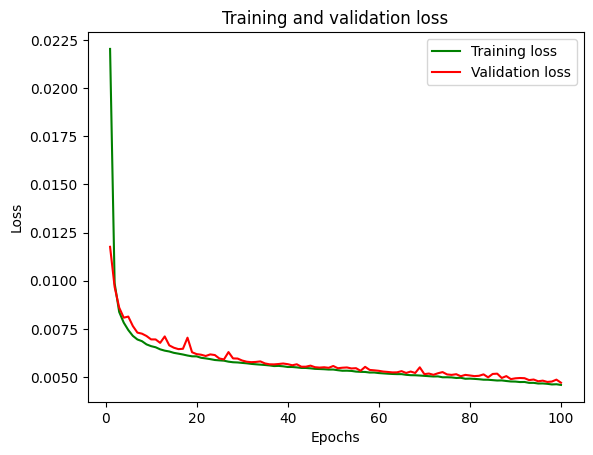

In [15]:
#plot the training and validation loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

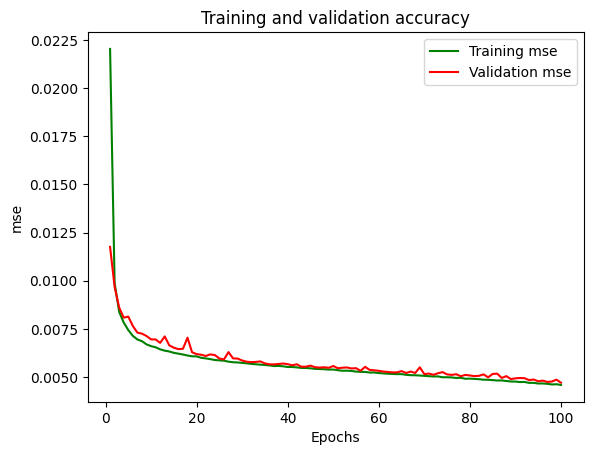

In [16]:
#plot the training and validation mse at each epoch
mse = history.history['mse']
val_mse = history.history['val_mse']
epochs = range(1, len(mse) + 1)

plt.plot(epochs, mse, 'g', label='Training mse')
plt.plot(epochs, val_mse, 'r', label='Validation mse')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend()
plt.show()

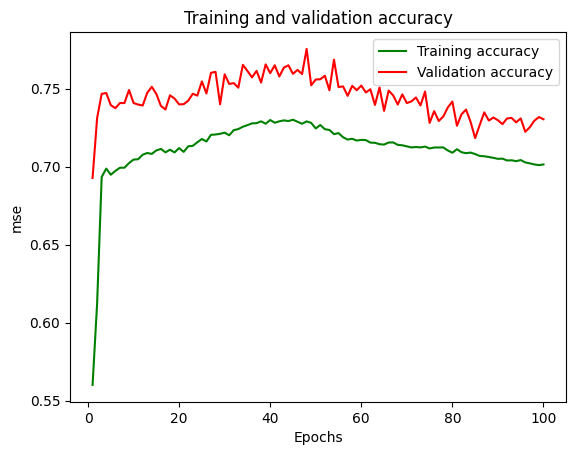

In [17]:
#plot the training and validation mse at each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(mse) + 1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend()
plt.show()

In [18]:
# Get all batches generated by the datagen and pick a batch for prediction
#Just to test the model.
data_batch = []  #Capture all training batches as a numpy array
img_num = 0
while img_num <= train_generator.batch_index:   #gets each generated batch of size batch_size
    data = next(train_generator)
    data_batch.append(data[0])
    img_num = img_num + 1

print('Done')

Done


In [19]:
predicted = model.predict(data_batch[0])  #Predict on the first batch of images

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


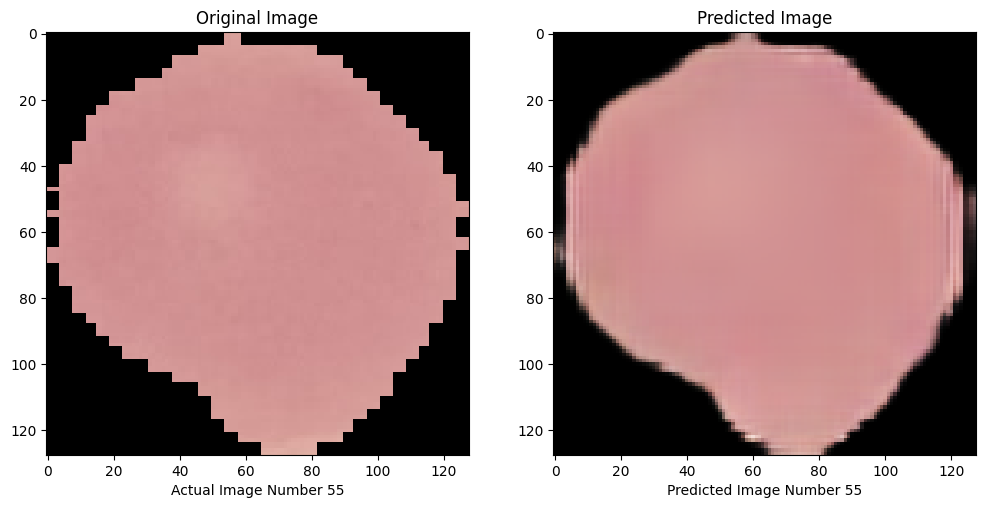

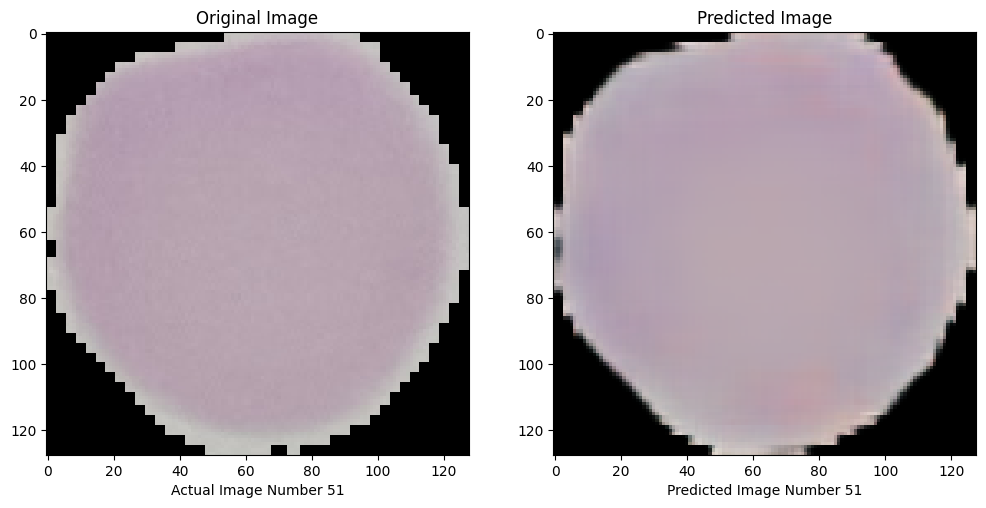

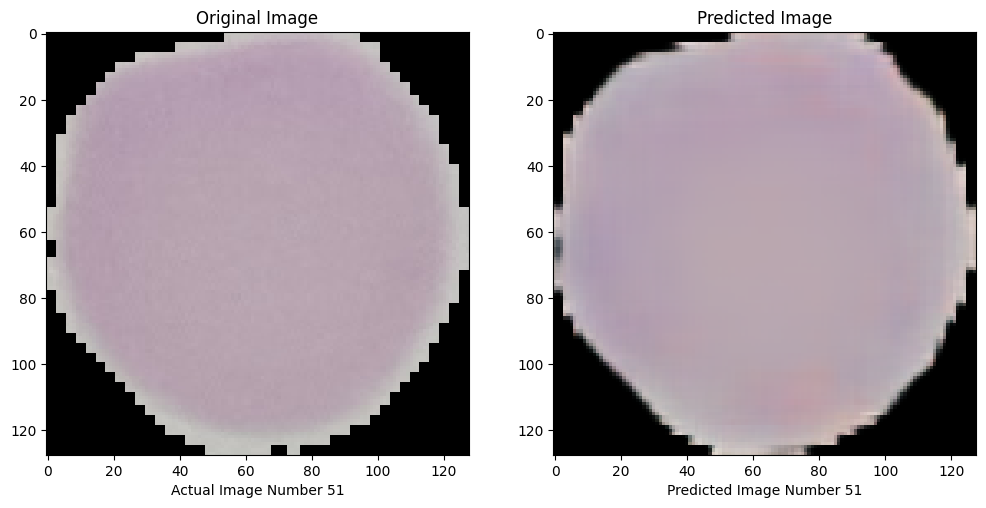

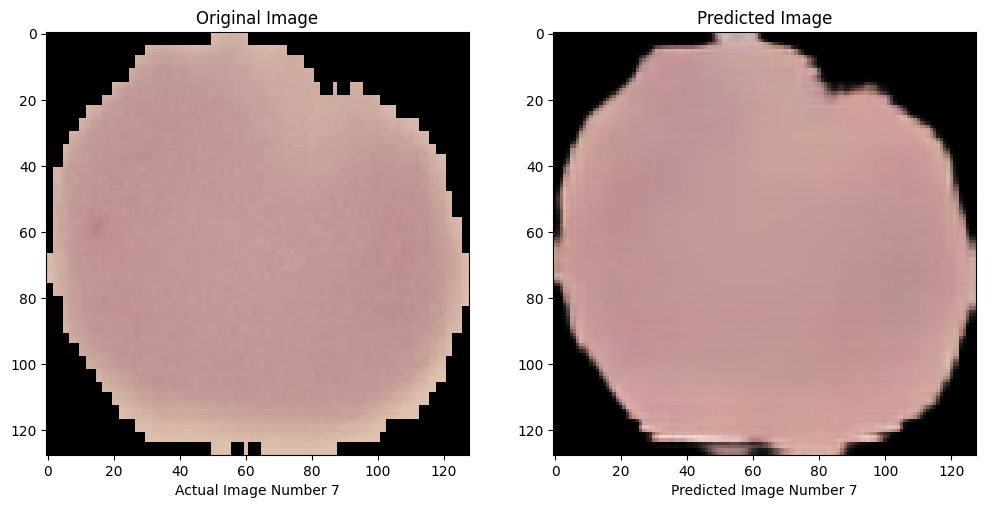

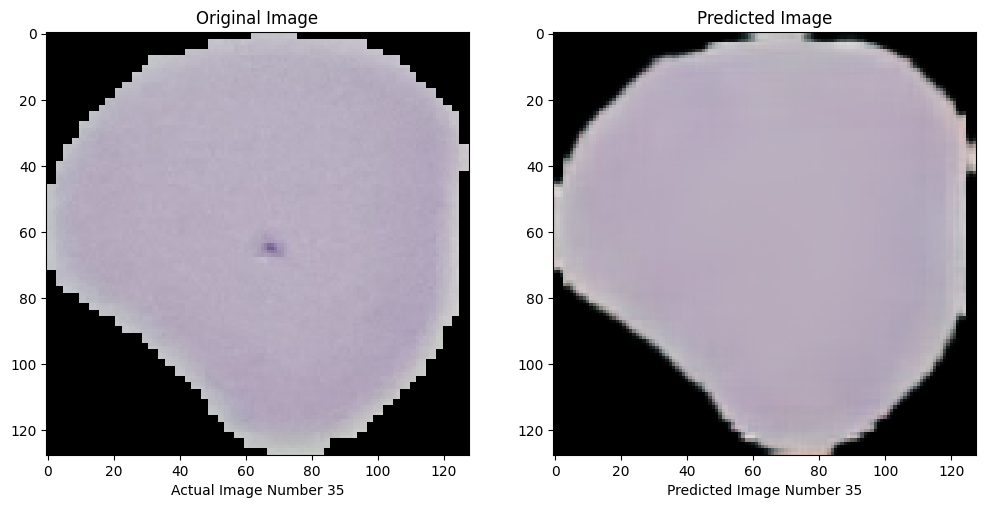

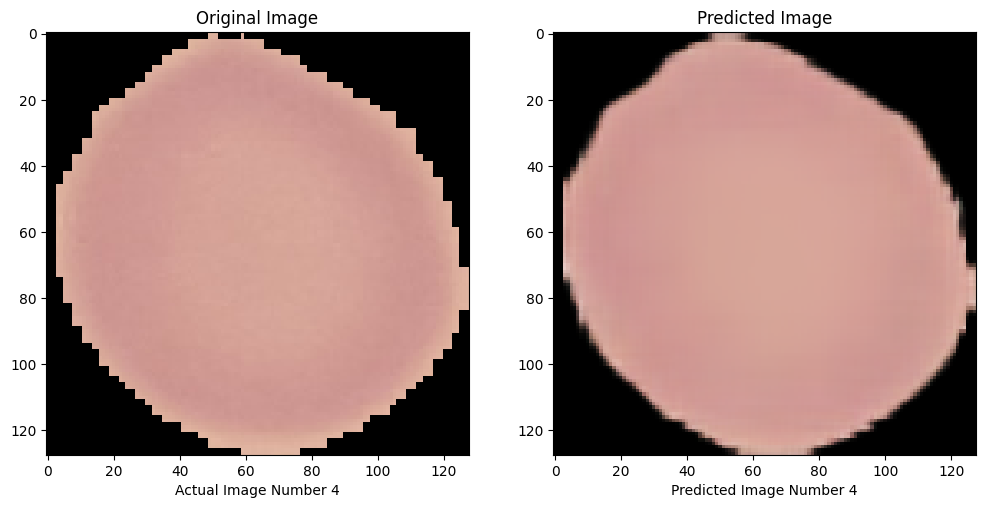

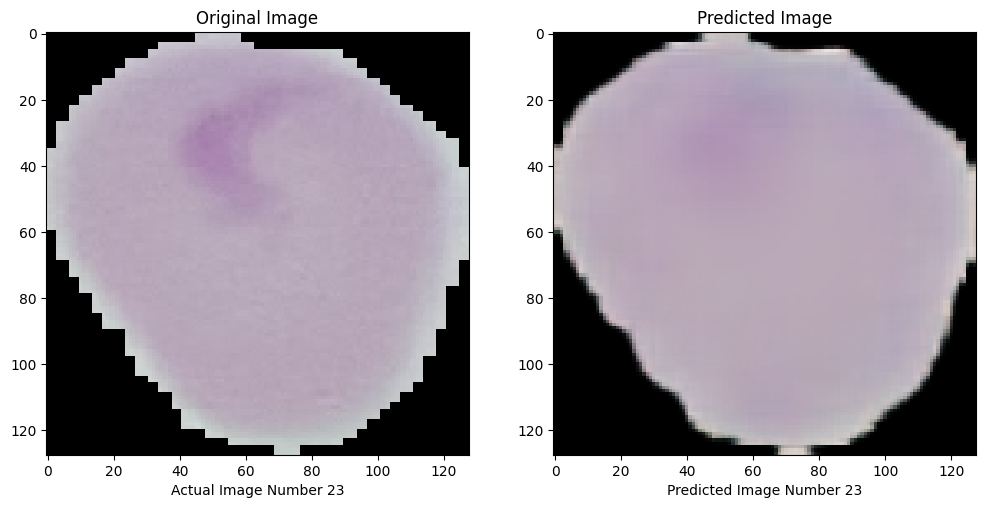

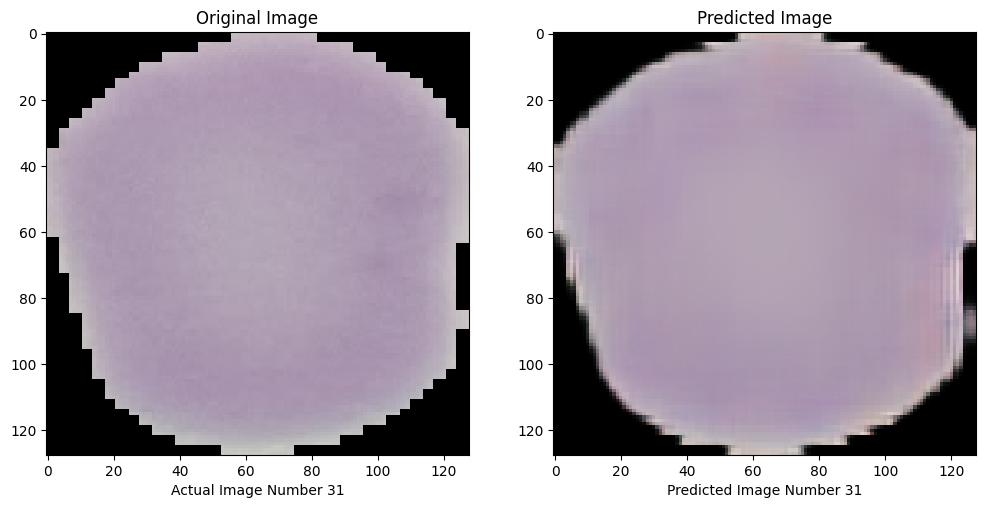

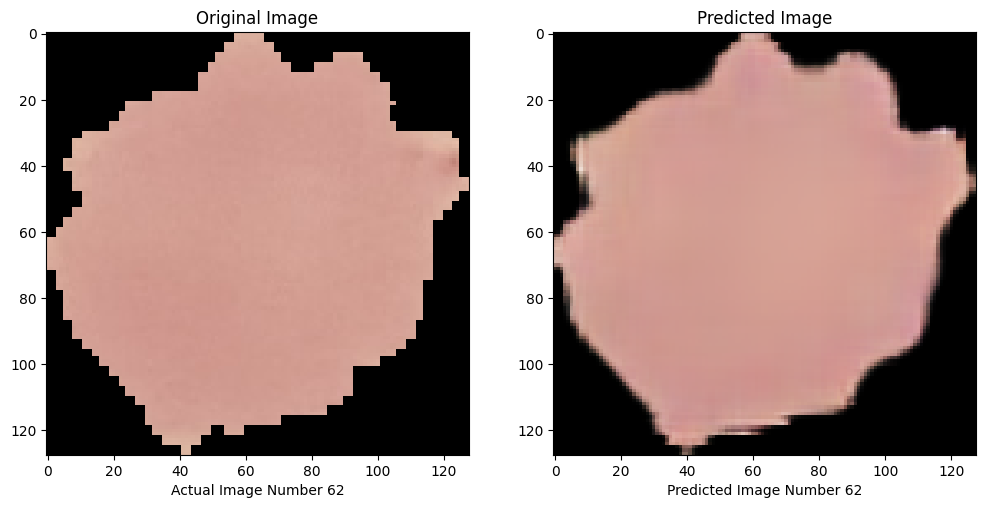

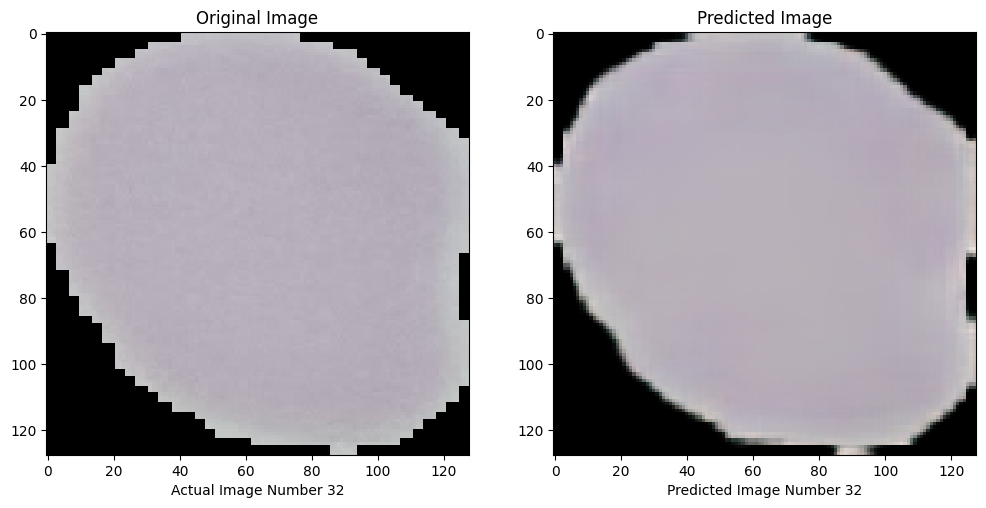

In [20]:
# Sanity check

for i in range(0,10):
    number = [i for i in range(0,63)]
    image_number = random.choice(number)
    plt.figure(figsize=(12, 8))

    # Display the original image
    plt.subplot(1, 2, 1)  # (1 row, 2 columns, 1st subplot)
    plt.imshow(data_batch[0][image_number])
    plt.xlabel(f'Actual Image Number {image_number}')# Assuming data_batch[0] contains the images
    plt.title("Original Image")

    # Display the predicted image (or corresponding output)
    plt.subplot(1, 2, 2)  # (1 row, 2 columns, 2nd subplot)
    plt.imshow(predicted[image_number])
    plt.xlabel(f'Predicted Image Number {image_number}')
    plt.title("Predicted Image")

    # Show the plots
    plt.show()

In [21]:
#Let us examine the reconstruction error between our validation data (good/normal images)
# and the anomaly images
validation_error = model.evaluate(validation_generator)
anomaly_error = model.evaluate(anomaly_generator)

print("Recon. error for the validation (normal) data is: ", validation_error)
print("Recon. error for the anomaly data is: ", anomaly_error)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7326 - loss: 0.0047 - mse: 0.0047
216/216 ━━━━━━━━━━━━━━━━━━━━ 23s 104ms/step - accuracy: 0.7184 - loss: 0.0057 - mse: 0.0057
Recon. error for the validation (normal) data is:  [0.0047003780491650105, 0.0047003780491650105, 0.7303594946861267]
Recon. error for the anomaly data is:  [0.005714988801628351, 0.005714988801628351, 0.7181639671325684]


In [22]:
# for calculating kde or latency space

In [23]:
# Create a new model for the encoder
encoder_model = Sequential()

# Add the layers to the encoder model with pre-trained weights
encoder_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(size, size, 3)))

encoder_model.add(MaxPooling2D((2, 2), padding='same'))

encoder_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

encoder_model.add(MaxPooling2D((2, 2), padding='same'))

encoder_model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))

encoder_model.add(MaxPooling2D((2, 2), padding='same'))

encoder_model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

encoder_model.add(MaxPooling2D((2, 2), padding='same'))

# Summary of the encoder model to check the structure
encoder_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 64, 64, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 8)             │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,040 (101.72 KB)

 Trainable params: 26,040 (101.72 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Calculate KDE using sklearn
from sklearn.neighbors import KernelDensity

In [25]:
encoded_images = encoder_model.predict(train_generator)

214/214 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step


In [26]:
encoder_output_shape = encoder_model.output_shape
print(encoder_output_shape)
encoder_output_shape = encoder_output_shape[1:]
print(encoder_output_shape)

(None, 8, 8, 8)
(8, 8, 8)


In [28]:
one_vector_shape = encoder_output_shape[0]*encoder_output_shape[1]*encoder_output_shape[2]
print(one_vector_shape)

512


In [30]:
encoded_images_vector = [np.reshape(img,(one_vector_shape))for img in encoded_images]


In [31]:
# Fit the kde to image data
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(encoded_images_vector)

In [35]:
def calc_density_and_reconstruction_error(batch_images):
    density_list = []
    recon_error_list = []

    for im in range(batch_images.shape[0]):
        # Get an individual image from the batch and add the batch dimension back
        img = batch_images[im][np.newaxis, :, :, :]

        # Create a compressed version of the image using the encoder
        encoded_img = encoder_model.predict(img)
        encoded_img = np.reshape(encoded_img, (encoded_img.shape[0], -1))  # Flatten the compressed image

        # Get a density score for the new image
        density = kde.score_samples(encoded_img)

        # Reconstruct the image using the model
        reconstruction = model.predict(img)

        # Calculate reconstruction error (e.g., Mean Squared Error)
        reconstruction_error = np.mean(np.square(img - reconstruction))

        density_list.append(density[0])  # density is returned as an array, so we take the first element
        recon_error_list.append(reconstruction_error)

    # Compute average and standard deviation of density and reconstruction errors
    average_density = np.mean(density_list)
    stdev_density = np.std(density_list)

    average_recon_error = np.mean(recon_error_list)
    stdev_recon_error = np.std(recon_error_list)

    return {"average_density":average_density,
            "stdev_density":stdev_density,
            "average_recon_error":average_recon_error,
            "stdev_recon_error":stdev_recon_error}

# Get average and std dev. of density and recon. error for uninfected and anomaly (parasited) images.
# For this, let's generate a batch of images for each.
train_batch = next(train_generator)[0]
anomaly_batch = next(anomaly_generator)[0]

uninfected_values = calc_density_and_reconstruction_error(train_batch)
anomaly_values = calc_density_and_reconstruction_error(anomaly_batch)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

In [36]:
print(uninfected_values)

{'average_density': 348.9285349095547, 'stdev_density': 1.3735355258229982, 'average_recon_error': 0.0043520415, 'stdev_recon_error': 0.0012197386}


In [37]:
print(anomaly_values)

{'average_density': 347.85149063853225, 'stdev_density': 1.937663064772582, 'average_recon_error': 0.005762243, 'stdev_recon_error': 0.001368351}
